In [151]:
from Libs.Beholder import *

a = Beholder(videoFrameGenerator=pullPhoneScreen)

a.addLayerModifer(
    Beholder_Layer_Chopper_Grayscale(name="gray", from_layer="image", enabled=True)
)

a.addLayerModifer(
    Beholder_Layer_Chopper_AtCord(
        name="inventory",
        from_layer="gray",
        x=1903,
        y=355,
        w=2222 - 1903,
        h=905 - 355,
        enabled=True,
    )
)
a.addLayerModifer(
    Beholder_Layer_Chopper_AtCord(
        name="Horizon",
        from_layer="image",
        x=690,
        y=320,
        w=1870 - 690,
        h=1,
        enabled=False,
    )
)
a.addLayerModifer(
    Beholder_Layer_Chopper_InRange(
        name="Horizon Enemy Finder",
        from_layer="Horizon",
        lbounds=[3, 0, 0],
        ubounds=[13, 248, 255],
        enabled=False,
    )
)

09:10:42.594738 - tts: startup


In [ ]:
raise Exception()

# Auto-Repeat smithing


In [ ]:
a.matchers = {}
a.addMatcher(
    Beholder_Image_Matcher(
        name="Button",
        layer="gray",
        filename="./templates/ui/Begin_project.png",
        convertToGray=True,
    )
)
a.addMatcher(
    Beholder_Image_Matcher(
        name="UnfinishedSmithing",
        layer="inventory",
        filename="./templates/inventory/forge_item.png",
    )
)
a.addMatcher(
    Beholder_Image_Matcher(
        name="FinishedArrow",
        layer="gray",
        filename="./templates/ui/FinishedArrow.png",
        convertToGray=True,
    )
)

time_since_heat = time.time()
time_smithing = time.time()

In [ ]:
Button_count = 0
Anvil_count = 0
tts("starting autosmith")
while True:
    matches = a.findMatches()
    if len(matches) > 0:
        if "UnfinishedSmithing" in matches:
            Button_count = 0
            Anvil_count = 0
            if time.time() - time_since_heat > 30:
                adb(f"shell input tap 1192 150")
                # tts("heat", volume=0.1)
                sleep(5)
                adb(f"shell input tap 1550 525")
                time_since_heat = time.time()
            sleep(7)
            continue
        if "FinishedArrow" in matches:
            center = matches["FinishedArrow"][0][1]
            adb(f"shell input tap {center[0]} {center[1]}")
            tts(f"Completed in {int(time.time()-time_smithing)} seconds")
            time_smithing = time.time()
            tts("come change if needed")
            sleep(20)
        if "Button" in matches:
            if Button_count == 0:
                center = matches["Button"][0][1]
                adb(f"shell input tap {center[0]} {center[1]}")
                tts("starting item")
                print(f"starting new item")
                Button_count += 1
            elif Button_count > 5:
                tts("Cannot continue smithing. Possible Out of ores")
                a.layers["image"].show()
                break
            else:
                tts("Finished, Please select new item you have 20 seconds")
                time.sleep(20)

                center = matches["Button"][0][1]
                adb(f"shell input tap {center[0]} {center[1]}")
                Button_count += 1

    else:
        if Anvil_count == 0:
            adb(f"shell input tap 1550 525")
            time_since_heat = 0
            Anvil_count += 1
        else:
            tts("Cannot continue smithing. Possible Inventory Scanning Issue")
            a.layers["image"].show()
            break
    sleep(3.75)
tts("Cannot Continue")

In [ ]:
tts("finish autosmith")
while True:
    matches = a.findMatches()
    if len(matches) > 0:
        if "UnfinishedSmithing" not in matches:
            break
    sleep(3)
tts("finished")

# Auto Smelt Ores

In [ ]:
a.matchers = {}

a.addMatcher(
    Beholder_Image_Matcher(
        name="close_btb",
        layer="gray",
        filename="./templates/ui/crafting_dialog_close_button.png",
        convertToGray=True,
    )
)
a.addMatcher(
    Beholder_Image_Matcher(
        name="Button",
        layer="gray",
        filename="./templates/ui/Begin_project.png",
        convertToGray=True,
    )
)

In [ ]:
tts("starting auto smelt ")
s = time.time()
Button_count = 0
while True:
    matches = a.findMatches()
    if len(matches) > 0:
        if "close_btb" in matches:
            Button_count = 0
            sleep(5)
            continue
        else:
            if "Button" in matches:
                if Button_count == 0:
                    center = matches["Button"][0][1]
                    adb(f"shell input tap {center[0]} {center[1]}")
                    Button_count += 1
                    s = time.time()
                if Button_count > 3:
                    tts("Out of Ore Please select new ore type")
                    a.layers["image"].show()
                    break
                else:
                    adb(f"shell input tap 518 1029")
                    Button_count += 1
    else:
        tts(f"Fin, {int(time.time()-s)} Seconds.")
        adb(f"shell input tap 1150 780")
        sleep(3)
        adb(f"shell input tap 518 1029")
    sleep(3)
tts("Finished")

# Bolt Featherer


In [ ]:
a.matchers = {}
a.addMatcher(
    Beholder_Image_Matcher(
        name="bolts",
        layer="gray",
        filename="./templates/inventory/addy_bolts.png",
        convertToGray=True,
    )
)
a.addMatcher(
    Beholder_Image_Matcher(
        name="fletch",
        layer="gray",
        filename="./templates/ui/fletch.png",
        convertToGray=True,
    )
)
a.addMatcher(
    Beholder_Image_Matcher(
        name="close_btb",
        layer="gray",
        filename="./templates/ui/crafting_dialog_close_button.png",
        convertToGray=True,
    )
)

in_menu = False
while True:
    matches = a.findMatches()
    if len(matches) > 0:
        if "close_btb" in matches:
            print("Currently Crafting")
            sleep(2)
            continue
        if in_menu:
            if "fletch" in matches:
                center = matches["fletch"][0][1]
                adb(f"shell input tap {center[0]} {center[1]}")
                in_menu = False
        else:
            if "bolts" in matches:
                center = matches["bolts"][0][1]
                adb(f"shell input tap {center[0]} {center[1]}")
                in_menu = True
    else:
        break
    sleep(2)
tts("Cannot Continue")

a.layers["image"].show()

# Mine and store in OreChest/NotePaper/Mining Stamina

In [161]:
a.matchers = {}
a.addMatcher(
    Beholder_Image_Matcher(
        name="paper",
        layer="gray",
        filename="./templates/inventory/notepaper.png",
    )
)
a.addMatcher(
    Beholder_Image_Matcher(
        name="ore",
        layer="gray",
        filename="./templates/inventory/ore/copper.png",
    )
)
a.addMatcher(
    Beholder_Image_Matcher(
        name="orebox", layer="gray", filename="./templates/inventory/ore/box2.png"
    )
)

s = time.time()
ore_box_full = False
ob_try = 0
start_mining = 0
previous_ore_count = 0

In [162]:
tts("starting AutoMiner")
while True:
    if time.time() - start_mining >= 20:
        print("reset mining")
        adb(f"shell input tap 1215 830")
        start_mining = time.time()
    matches = a.findMatches()
    if len(matches.keys()) > 0:
        if "ore" in matches:
            if previous_ore_count != matches["ore"][0][2]:
                print(f"{matches['ore'][0][2]} ores in inventory")
                previous_ore_count = matches["ore"][0][2]
            if matches["ore"][0][2] >= 10:

                tts(f"C {int(time.time() - s)}")
                s = time.time()
                if not ore_box_full:
                    if "orebox" in matches:
                        tts("oreboxing")
                        center = matches["orebox"][0][1]
                        adb(f"shell input tap {center[0]} {center[1]}")
                        time.sleep(1)
                        matches = a.findMatches()
                        if "ore" in matches.keys():
                            ob_try += 1
                            if ob_try > 3:
                                print("I think the ore box is full!")
                                ore_box_full = True
                                tts("orebox is full, starting to use paper")
                            continue

                        else:
                            start_mining = 0
                            continue

                if "ore" in matches and matches["ore"][0][2] > 1:
                    tts("papering")
                    center = matches["ore"][0][1]
                    adb(f"shell input tap {center[0]} {center[1]}")
                    time.sleep(0.5)
                    if "paper" in matches:
                        center = matches["paper"][0][1]
                        adb(f"shell input tap {center[0]} {center[1]}")
                        start_mining = 0
                        time.sleep(2)
                    else:
                        print("out of paper")
                        tts("no more paper")
                        break
    if start_mining != 0:
        sleep(10)

tts("Cannot Continue")

09:29:43.264817 - tts: starting AutoMiner
reset mining
15 ores in inventory
09:29:47.626531 - tts: C 5
09:29:48.521617 - tts: papering
out of paper
09:29:50.709121 - tts: no more paper
09:29:51.729081 - tts: Cannot Continue


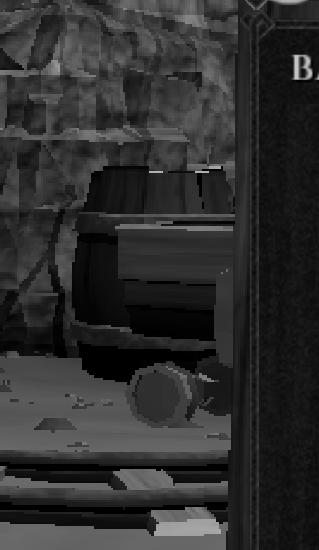

In [160]:
a.layers["inventory"].show()

# Scareb gather - wip

In [ ]:
a.matchers = {}
for i in range(0, 5):
    print(i)
    a.addMatcher(
        Beholder_Image_Matcher(
            name="bug",
            layer="gray",
            filename=f"./templates/bug{i}.png",
            convertToGray=True,
            threshhold=0.9,
        )
    )
while True:
    matches = a.findMatches()
    if len(matches) > 0:
        print(matches)
    print(".")
tts("Cannot Continue")

In [ ]:
a.layers

# Other Stuff

In [ ]:
time.time() - s

In [ ]:
447 / 20

In [ ]:
tts("Cannot Continue")

In [ ]:
a.layer_modifiers["Horizon"].enabled = True
a.layer_modifiers["Horizon Enemy Finder"].enabled = True

In [ ]:
while True:
    a.readNextImage()
    a.digestImage()

    a.layers["Horizon Enemy Finder"].show()

In [ ]:
a.layer_modifiers["Horizon"].enabled = False
a.layer_modifiers["Horizon Enemy Finder"].enabled = False

In [ ]:
target_color = (143, 4, 13)
tolarance = 75

target_info_cords = (460, 546)
target_info_color = (17, 42, 50)

In [ ]:
a.layers["Horizon Enemy Finder"].show()

In [ ]:
a.layers["Horizon Enemy Finder"].show()

In [ ]:
for item in a.matchers:
    print(item.name, item.data.shape)

In [ ]:
matches = a.findMatches()
print(matches.keys())

In [ ]:
a.layers["gray"].data.shape